In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
x = np.array([0, 0.1, 1, 1.8, 2.5, 3.1, 3.3, 3.7, 4, 4.8, 5.5, 6, 6.3, 6.8, 7.3, 8, 8.8, 9.2, 9.6, 10]).reshape((-1, 1))
y = np.array([5, 4.7, 4, 3.7, 3.9, 4, 3.7, 3.4, 3.8, 3, 2.5, 2.3, 1.9, 1.7, 2.1, 1.8, 2.3, 0.7, 1.3, 1])


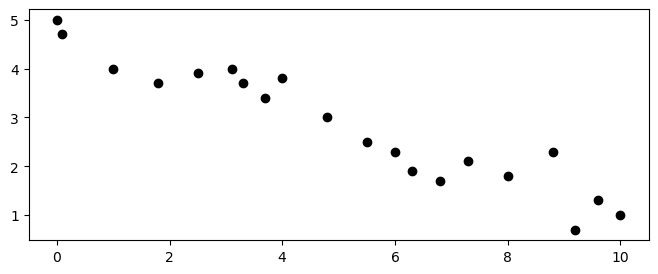

In [3]:
plt.figure(figsize=(8,3))
plt.plot(x, y,'o',color='k')
plt.show()

In [4]:
b0 = 0
w0 = np.random.randint(1,x.shape[0])                                          

print(f"x Shape: {x.shape}, x Type:{type(x)}\n")
print(x)
print(f"y Shape: {y.shape}, y Type:{type(y)}\n)")
print(y)



x Shape: (20, 1), x Type:<class 'numpy.ndarray'>

[[ 0. ]
 [ 0.1]
 [ 1. ]
 [ 1.8]
 [ 2.5]
 [ 3.1]
 [ 3.3]
 [ 3.7]
 [ 4. ]
 [ 4.8]
 [ 5.5]
 [ 6. ]
 [ 6.3]
 [ 6.8]
 [ 7.3]
 [ 8. ]
 [ 8.8]
 [ 9.2]
 [ 9.6]
 [10. ]]
y Shape: (20,), y Type:<class 'numpy.ndarray'>
)
[5.  4.7 4.  3.7 3.9 4.  3.7 3.4 3.8 3.  2.5 2.3 1.9 1.7 2.1 1.8 2.3 0.7
 1.3 1. ]


In [5]:
def f(x, w, b): 

    f=x.dot(w.T)+b                                                      #f= np.dot(x, w) + b     
    return f  


In [6]:
def f_loop(x, w, b): 

    n = x.shape[0]
    f = 0
    for i in range(n):
        f_i = x[i] * w[i]
        f = f + f_i         
    f = f + b                
    return f

In [7]:
def j(x, y, w, b): 

    m = x.shape[0]
    sum = 0
    for i in range(m):                                
        yhat_i = np.dot(x[i], w) + b           
        sum = sum + (yhat_i - y[i])**2       
    sum = sum / (2 * m)                          
    return sum

In [8]:
sum = j(x, y, w0, b0)
print(f'Cost at optimal w : {sum}\n')

Cost at optimal w : [4931.031]



In [9]:
def dj(x, y, w, b): 

    m,n = x.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
 
tmp_dj_db, tmp_dj_dw = dj(x, y, w0, b0)
print(f'dj_db at initial w,b: {tmp_dj_db}\n')

print(f'dj_dw at initial w,b: {tmp_dj_dw}\n')


dj_db at initial w,b: [83.69]

dj_dw at initial w,b: [590.442]



In [10]:
def gradient_descent(x, y, w0, b0, j, dj, alpha, num_iters): 

    
    
    J_history = []
    w = copy.deepcopy(w0) 
    b = b0
    
    for i in range(num_iters):

        
        dj_db,dj_dw = dj(x, y, w, b)   

        
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        
        if i<100000:      
            J_history.append( j(x, y, w, b))

        
        if i% math.ceil(num_iters / 10) == 0:
             
             print(f"Iteration {i:4} : {np.array2string(J_history[-1], precision=1,formatter={'float': '{:.2e}'.format})}\n")
                
        
    return w, b, J_history 


In [11]:
w0 = np.zeros_like(w0)                          #initial_w,initial_b
b0 = 0

iterations = 8000
alpha = 1.0e-3

w_f, b_f, J_hist = gradient_descent(x, y, w0 , b0 ,j, dj, alpha, iterations)

print(f"b,w found by gradient descent: {b_f},{w_f}\n ")
m,_ = x.shape
for i in range(m):
    print(f"prediction: {np.dot(x[i],w_f)+b_f}, target value: {y[i]}\n")

Iteration    0 : [4.65e+00]

Iteration  800 : [2.02e+00]

Iteration 1600 : [1.35e+00]

Iteration 2400 : [9.09e-01]

Iteration 3200 : [6.20e-01]

Iteration 4000 : [4.29e-01]

Iteration 4800 : [3.04e-01]

Iteration 5600 : [2.22e-01]

Iteration 6400 : [1.67e-01]

Iteration 7200 : [1.32e-01]

b,w found by gradient descent: [4.18254372],[-0.2935975]
 
prediction: [4.18254372], target value: 5.0

prediction: [4.15318397], target value: 4.7

prediction: [3.88894622], target value: 4.0

prediction: [3.65406822], target value: 3.7

prediction: [3.44854997], target value: 3.9

prediction: [3.27239147], target value: 4.0

prediction: [3.21367197], target value: 3.7

prediction: [3.09623297], target value: 3.4

prediction: [3.00815372], target value: 3.8

prediction: [2.77327572], target value: 3.0

prediction: [2.56775747], target value: 2.5

prediction: [2.42095872], target value: 2.3

prediction: [2.33287947], target value: 1.9

prediction: [2.18608072], target value: 1.7

prediction: [2.039281

In [12]:
xx = np.linspace(0,11,100).reshape((-1, 1))

yy = np.dot(xx, w_f) + b_f

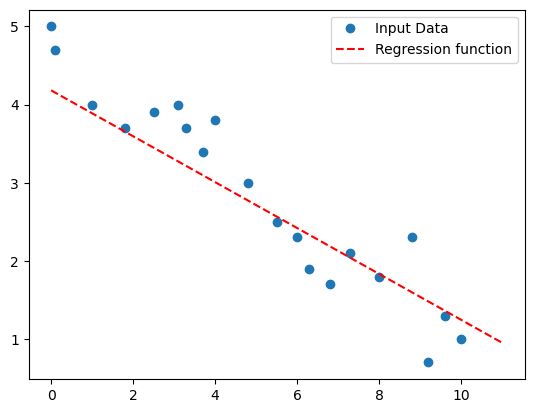

In [13]:
plt.plot(x, y, 'o', xx, yy, 'r--') 
plt.legend(['Input Data', 'Regression function'])
plt.show()

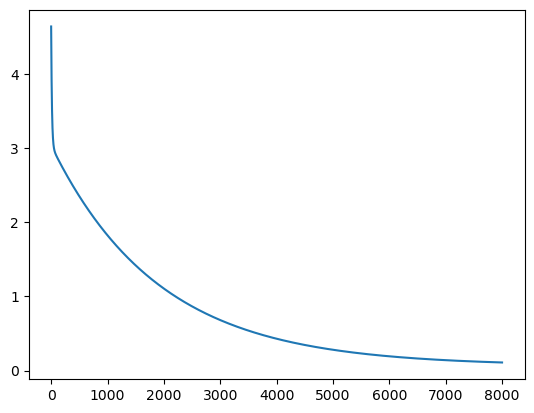

In [14]:
plt.plot(J_hist)
plt.show()
